In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 500)


In [53]:
train_data = pd.read_csv('/content/train.csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [54]:
def preprocessing_data(data):
  data.Cabin.fillna(1, inplace=True)
  data['Cabin'] = data.Cabin.map(lambda x: 0 if x != 1 else 1)
  data['Sex'] = data.Sex.map(lambda x: 1 if x == 'male' else 0)
  data['Age'].fillna(data['Age'].median(), inplace = True)
  data.dropna(inplace=True)

preprocessing_data(train_data)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1,S


In [55]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [56]:
y = train_data.Survived
cols = ['Sex', 'Age', 'Pclass', 'SibSp', 'Fare', 'Cabin', 'Parch']
X = train_data[cols]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.75


In [39]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier(random_state=0)
tr.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(tr.score(X_test, y_test)))

Test set accuracy: 0.80


In [40]:
from sklearn.ensemble import RandomForestClassifier
def get_estimatros(n_estimators):
  rnf = RandomForestClassifier(n_estimators=n_estimators)
  rnf.fit(X_train, y_train)
  return rnf.score(X_test, y_test)

In [ ]:
estimators = {}
for x in range(50, 1000, 50):
  estimators.update({x: get_estimatros(x)})

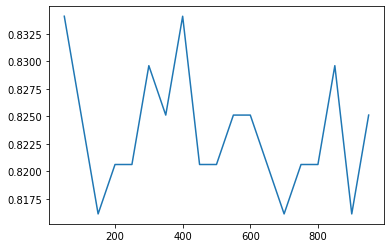

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(estimators.keys()), list(estimators.values()))
plt.show()

In [58]:
from sklearn.ensemble import RandomForestClassifier
rnf = RandomForestClassifier(n_estimators=100)
rnf.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
test_data = pd.read_csv('/content/test.csv')
preprocessing_data(test_data)

In [60]:
X_s = test_data[cols]

In [62]:
preds = rnf.predict(X_s)


In [63]:
output = pd.DataFrame({'PassengerId': X_s.index, 'Survived': preds})
output.to_csv('submission.csv', index=False)